In [1]:
import numpy as np
import pandas as pd
import requests
from scipy.stats import norm, chi2, genpareto
import matplotlib.pyplot as plt
from arch import arch_model
%matplotlib inline

In [2]:
data=pd.read_excel('data.xlsx')
data

,Unnamed: 0,date,open,high,low,close,volumn
0,0,1992-11-17,76.00,76.50,61.90,73.50,13051800
1,1,1992-11-18,70.00,87.00,70.00,85.10,8871100
2,2,1992-11-19,86.00,93.50,80.00,88.20,650000
3,3,1992-11-20,89.00,90.80,85.05,88.90,1305200
4,4,1992-11-23,90.00,94.00,89.10,93.70,887100
...,...,...,...,...,...,...,...
7309,7309,2023-06-05,11.25,11.40,11.03,11.39,3141326
7310,7310,2023-06-06,11.46,11.58,11.31,11.39,4408895
7311,7311,2023-06-07,11.26,11.40,11.16,11.24,4106022
7312,7312,2023-06-08,11.35,11.43,11.19,11.43,4149589


In [3]:
data.drop(columns=data.columns[0],inplace=True)
data

,date,open,high,low,close,volumn
0,1992-11-17,76.00,76.50,61.90,73.50,13051800
1,1992-11-18,70.00,87.00,70.00,85.10,8871100
2,1992-11-19,86.00,93.50,80.00,88.20,650000
3,1992-11-20,89.00,90.80,85.05,88.90,1305200
4,1992-11-23,90.00,94.00,89.10,93.70,887100
...,...,...,...,...,...,...
7309,2023-06-05,11.25,11.40,11.03,11.39,3141326
7310,2023-06-06,11.46,11.58,11.31,11.39,4408895
7311,2023-06-07,11.26,11.40,11.16,11.24,4106022
7312,2023-06-08,11.35,11.43,11.19,11.43,4149589


In [4]:
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d')
for i in data.columns[1:]:
    data[i].astype(float)
data

,date,open,high,low,close,volumn
0,1992-11-17,76.00,76.50,61.90,73.50,13051800
1,1992-11-18,70.00,87.00,70.00,85.10,8871100
2,1992-11-19,86.00,93.50,80.00,88.20,650000
3,1992-11-20,89.00,90.80,85.05,88.90,1305200
4,1992-11-23,90.00,94.00,89.10,93.70,887100
...,...,...,...,...,...,...
7309,2023-06-05,11.25,11.40,11.03,11.39,3141326
7310,2023-06-06,11.46,11.58,11.31,11.39,4408895
7311,2023-06-07,11.26,11.40,11.16,11.24,4106022
7312,2023-06-08,11.35,11.43,11.19,11.43,4149589


In [5]:
data.sort_values(by='date',inplace=True)
data

,date,open,high,low,close,volumn
0,1992-11-17,76.00,76.50,61.90,73.50,13051800
1,1992-11-18,70.00,87.00,70.00,85.10,8871100
2,1992-11-19,86.00,93.50,80.00,88.20,650000
3,1992-11-20,89.00,90.80,85.05,88.90,1305200
4,1992-11-23,90.00,94.00,89.10,93.70,887100
...,...,...,...,...,...,...
7309,2023-06-05,11.25,11.40,11.03,11.39,3141326
7310,2023-06-06,11.46,11.58,11.31,11.39,4408895
7311,2023-06-07,11.26,11.40,11.16,11.24,4106022
7312,2023-06-08,11.35,11.43,11.19,11.43,4149589


In [6]:
data['dret1']=np.log(data['close'])-np.log(data['close'].shift(periods=1))
data.dropna(inplace=True)
data

,date,open,high,low,close,volumn,dret1
1,1992-11-18,70.00,87.00,70.00,85.10,8871100,0.146542
2,1992-11-19,86.00,93.50,80.00,88.20,650000,0.035780
3,1992-11-20,89.00,90.80,85.05,88.90,1305200,0.007905
4,1992-11-23,90.00,94.00,89.10,93.70,887100,0.052586
5,1992-11-24,94.00,117.00,94.00,115.00,1478100,0.204834
...,...,...,...,...,...,...,...
7309,2023-06-05,11.25,11.40,11.03,11.39,3141326,0.009705
7310,2023-06-06,11.46,11.58,11.31,11.39,4408895,0.000000
7311,2023-06-07,11.26,11.40,11.16,11.24,4106022,-0.013257
7312,2023-06-08,11.35,11.43,11.19,11.43,4149589,0.016763


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7784\958721504.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp=tmp[ind]


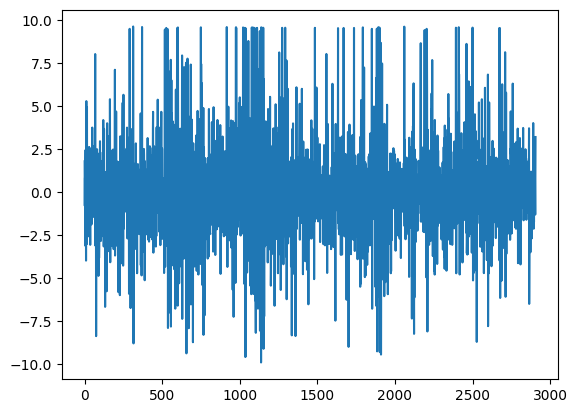

In [7]:
# ind = data['day'] >= pd.to_datetime('2011-01-01', format='%Y-%m-%d')
ind=data['dret1']>=-0.1
tmp = data[data['date'] >= pd.to_datetime('2011-01-01', format='%Y-%m-%d')]
tmp=tmp[ind]
r=tmp[tmp['date'] >= pd.to_datetime('2011-01-01', format='%Y-%m-%d')]['dret1'].values*100
plt.plot(r)
plt.show()

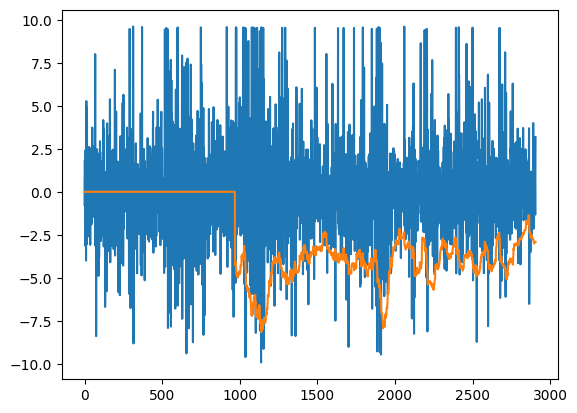

In [8]:
# RiskMetrics方法
l = np.fix(len(r)/3).astype(int)
VaR_RM = np.zeros(len(r))
qalpha = norm.ppf(0.05)
for i in range(l, len(r)):
    mhat, shat = norm.fit(r[i-50:i])
    VaR_RM[i] = -(mhat + qalpha*shat)
plt.plot(r)
plt.plot(VaR_RM*-1)
plt.savefig('riskmetrics.jpg')
plt.show()

In [9]:
from scipy.stats import gamma
qalpha = norm.ppf(0.05)
l = np.fix(len(r)/3).astype(int)
VaR_GN = np.zeros(len(r))
qalpha = norm.ppf(0.05)
for i in range(l, len(r)):
    am_ar_garch = arch_model(r[:i], mean='ar', lags=2, vol='garch', dist='t', p=2, q=2)
    res_ar_garch = am_ar_garch.fit()
    a = res_ar_garch.forecast(horizon=1, align='origin',reindex=False)
    print(a)
    mu = a.mean['h.1'].iloc[-1]
    sigma = a.variance['h.1'].iloc[-1]
    VaR_GN[i] = -(mu + qalpha * np.sqrt(sigma))
plt.plot(r)
plt.title('Gamma-Normal')
plt.plot(VaR_GN*-1)
plt.savefig('ans/3.png')
plt.show()

Iteration:      1,   Func. Count:     11,   Neg. LLF: 6908.662848580001
Iteration:      2,   Func. Count:     24,   Neg. LLF: 4098.207272789474
Iteration:      3,   Func. Count:     36,   Neg. LLF: 3619.92223705974
Iteration:      4,   Func. Count:     49,   Neg. LLF: 3264.7953601244785
Iteration:      5,   Func. Count:     60,   Neg. LLF: 3507.733522100447
Iteration:      6,   Func. Count:     71,   Neg. LLF: 3300.673035217736
Iteration:      7,   Func. Count:     82,   Neg. LLF: 3258.5223305676645
Iteration:      8,   Func. Count:     93,   Neg. LLF: 3114.006842520989
Iteration:      9,   Func. Count:    104,   Neg. LLF: 3325.0646113040984
Iteration:     10,   Func. Count:    115,   Neg. LLF: 2283.0155268104445
Iteration:     11,   Func. Count:    126,   Neg. LLF: 3031.075158013626
Iteration:     12,   Func. Count:    137,   Neg. LLF: 2275.988013874283
Iteration:     13,   Func. Count:    147,   Neg. LLF: 2281.781358059039
Iteration:     14,   Func. Count:    158,   Neg. LLF: 2275.93

KeyboardInterrupt: 

In [ ]:
l = np.fix(len(r)/3).astype(int)
VaR_EVT = np.zeros(len(r))
alpha = 0.05
for i in range(l, len(r)):
    his_sample = r[i-200:i]
    his_sample = np.sort(his_sample)
    ind = np.ceil(len(his_sample)*0.1).astype(int)
    evt_sample = np.abs(his_sample[:ind])
    u = evt_sample[-1]
    evt_sample = evt_sample - u
    evt_sample = np.delete(evt_sample, -1)

    n = len(his_sample)
    Nu = len(evt_sample)

    parmhat = genpareto.fit(evt_sample, floc=0)
    kHat = parmhat[0]; # Tail index parameter
    sigmaHat = parmhat[2]; # Scale parameter
    VaR_EVT[i] = u + sigmaHat / kHat * (((1-alpha) * n / Nu) ** -kHat - 1)
plt.plot(r)
plt.plot(VaR_EVT*-1)
plt.show()

In [ ]:
# 历史模拟方法
l = np.fix(len(r)/3).astype(int)
VaR_HS = np.zeros(len(r))
qalpha = int(200*0.05)
for i in range(l, len(r)):
    his_sample = r[i-200:i]
    his_sample = np.sort(his_sample)
    VaR_HS[i] = -his_sample[qalpha-1]
plt.plot(r)
plt.plot(VaR_HS*-1)
plt.show()

In [ ]:
import pandas as pd
data = pd.DataFrame({'return': r, 'VaR_RM': VaR_RM, 'VaR_GN': VaR_GN, 'VaR_HS': VaR_HS, 'VaR_EVT': VaR_EVT})
data.to_csv('Data_VaR.csv')

In [ ]:
def myfun_Kupiec(r, VaR, pstar):
    N = np.sum(r > VaR)
    T = len(r)
    LRuc = -2*((T-N)*np.log(1-pstar)+N*np.log(pstar)) + 2*((T-N)*np.log(1-N/T)+N*np.log(N/T))
    pvalue_LRuc = 1 - chi2.cdf(LRuc, 1)
    return LRuc, pvalue_LRuc

def myfun_Christoffersen(r, VaR):
    ind = r > VaR
    ind1 = ind[:-1]
    ind2 = ind[1:]
    n00 = np.sum((ind1==0) & (ind2==0))
    n01 = np.sum((ind1==0) & (ind2==1))
    n10 = np.sum((ind1==1) & (ind2==0))
    n11 = np.sum((ind1==1) & (ind2==1))

    Pi01 = n01/(n01+n00)
    Pi11 = n11/(n10+n11)
    Pi2 = (n01+n11)/(n00+n01+n10+n11)

    LRind = (n00+n10)*np.log(1-Pi2) + (n01+n11)*np.log(Pi2) - \
            n00*np.log(1-Pi01) - n01*np.log(Pi01) - n10*np.log(1-Pi11) - n11*np.log(Pi11)
    LRind = LRind*-2
    pvalue_LRind = 1 - chi2.cdf(LRind, 1)
    return LRind, pvalue_LRind

def myfun_Kupiec_Christoffersen(LRuc, LRind):
    LRcc = LRuc + LRind
    pvalue_LRcc = 1 - chi2.cdf(LRcc, 2)
    return LRcc, pvalue_LRcc

data = pd.read_csv('Data_VaR.csv')
ind = data['VaR_RM'] > 0
r = data.loc[ind, ['return']].values*-1
VaR_RM = data.loc[ind, ['VaR_RM']].values
VaR_GN = data.loc[ind, ['VaR_GN']].values
VaR_HS = data.loc[ind, ['VaR_HS']].values
VaR_EVT = data.loc[ind, ['VaR_EVT']].values

pstar = 0.05;
[LRuc_RM, pvalue_LRuc_RM] = myfun_Kupiec(r, VaR_RM, pstar)
[LRind_RM, pvalue_LRind_RM] = myfun_Christoffersen(r, VaR_RM)
[LRcc_RM, pvalue_LRcc_RM] = myfun_Kupiec_Christoffersen(LRuc_RM, LRind_RM)

[LRuc_GN, pvalue_LRuc_GN] = myfun_Kupiec(r, VaR_GN, pstar)
[LRind_GN, pvalue_LRind_GN] = myfun_Christoffersen(r, VaR_GN)
[LRcc_GN, pvalue_LRcc_GN] = myfun_Kupiec_Christoffersen(LRuc_GN, LRind_GN)

[LRuc_HS, pvalue_LRuc_HS] = myfun_Kupiec(r, VaR_HS, pstar)
[LRind_HS, pvalue_LRind_HS] = myfun_Christoffersen(r, VaR_HS)
[LRcc_HS, pvalue_LRcc_HS] = myfun_Kupiec_Christoffersen(LRuc_HS, LRind_HS)

[LRuc_EVT, pvalue_LRuc_EVT] = myfun_Kupiec(r, VaR_EVT, pstar)
[LRind_EVT, pvalue_LRind_EVT] = myfun_Christoffersen(r, VaR_EVT)
[LRcc_EVT, pvalue_LRcc_EVT] = myfun_Kupiec_Christoffersen(LRuc_EVT, LRind_EVT)


print('{:12s}, {:>12s}, {:>12s}, {:>12s}, {:>12s}, {:>12s}, {:>12s}'.format('', 'LRuc', 'pLRuc', 'LRind', 'pLRind', 'LRcc', 'pLRcc'))
print('{:12s}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}'.format('RiskMetrics', LRuc_RM, pvalue_LRuc_RM, LRind_RM, pvalue_LRind_RM, LRcc_RM, pvalue_LRcc_RM))
print('{:12s}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}'.format('GarchNormal', LRuc_GN, pvalue_LRuc_GN, LRind_GN, pvalue_LRind_GN, LRcc_GN, pvalue_LRcc_GN))
print('{:12s}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}'.format('HisSim', LRuc_HS, pvalue_LRuc_HS, LRind_HS, pvalue_LRind_HS, LRcc_HS, pvalue_LRcc_HS))
print('{:12s}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}, {:12.4f}'.format('EVT GPD', LRuc_EVT, pvalue_LRuc_EVT, LRind_EVT, pvalue_LRind_EVT,LRcc_EVT, pvalue_LRcc_EVT))

In [ ]:
import numpy as np

In [ ]:
m=np.sort([2,1,3])
m